In [1]:
import pandas as pd

C:\Users\SANTHOSH\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\SANTHOSH\miniconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\SANTHOSH\miniconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('stock_details/AMZN.csv')

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-05-10,47.687500,47.250000,47.674999,47.447498,41930000.0,47.447498
1,2017-05-11,47.514500,47.039001,47.255501,47.381001,43882000.0,47.381001
2,2017-05-12,48.139500,47.576500,47.724998,48.067501,72518000.0,48.067501
3,2017-05-15,48.157501,47.803001,47.936501,47.898499,85412000.0,47.898499
4,2017-05-16,48.502998,48.045502,48.049999,48.303501,62522000.0,48.303501


In [5]:
df['Moving_av']= df['Adj Close'].rolling(window=20,min_periods=0).mean()

In [7]:
i=1
upper_volatility=[df.iloc[0]['Moving_av']] 
lower_volatility=[df.iloc[0]['Moving_av']] 
while i<len(df):
    upper_volatility.append(df.iloc[i-1]['Moving_av']+3/100*df.iloc[i-1]['Moving_av'])
    lower_volatility.append(df.iloc[i-1]['Moving_av']-3/100*df.iloc[i-1]['Moving_av'])
    i+=1

In [10]:
df['Upper_volatility']=upper_volatility
df['Lower_volatility']=lower_volatility

In [12]:
df['Short_resistance']= df['High'].rolling(window=10,min_periods=0).max()

In [13]:
df['Short_support']= df['Low'].rolling(window=10,min_periods=0).min()

In [14]:
df['Long_resistance']= df['High'].rolling(window=50,min_periods=0).max()

In [15]:
df['Long_support']= df['Low'].rolling(window=50,min_periods=0).min()

In [16]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support
0,2017-05-10,47.687500,47.250000,47.674999,47.447498,41930000.0,47.447498,47.447498,47.447498,47.447498,47.687500,47.250000,47.687500,47.250000
1,2017-05-11,47.514500,47.039001,47.255501,47.381001,43882000.0,47.381001,47.414249,48.870923,46.024073,47.687500,47.039001,47.687500,47.039001
2,2017-05-12,48.139500,47.576500,47.724998,48.067501,72518000.0,48.067501,47.632000,48.836677,45.991822,48.139500,47.039001,48.139500,47.039001
3,2017-05-15,48.157501,47.803001,47.936501,47.898499,85412000.0,47.898499,47.698625,49.060960,46.203040,48.157501,47.039001,48.157501,47.039001
4,2017-05-16,48.502998,48.045502,48.049999,48.303501,62522000.0,48.303501,47.819600,49.129583,46.267666,48.502998,47.039001,48.502998,47.039001


In [21]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support
1290,2022-06-24,116.709999,111.430000,112.379997,116.459999,69867600.0,116.459999,114.040425,116.962860,110.149490,116.709999,101.430000,158.649002,101.260002
1291,2022-06-27,117.980003,112.699997,117.089996,113.220001,62133200.0,113.220001,114.147550,117.461638,110.619212,117.980003,101.430000,158.649002,101.260002
1292,2022-06-28,114.849998,107.040001,113.500000,107.400002,74942900.0,107.400002,113.760225,117.571977,110.723124,117.980003,101.430000,158.649002,101.260002
1293,2022-06-29,110.989998,106.910004,107.379997,108.919998,66375300.0,108.919998,113.195750,117.173032,110.347419,117.980003,102.010002,158.649002,101.260002
1294,2022-06-30,108.180000,102.519997,108.110001,106.209999,97679400.0,106.209999,112.422050,116.591623,109.799878,117.980003,102.010002,157.602493,101.260002


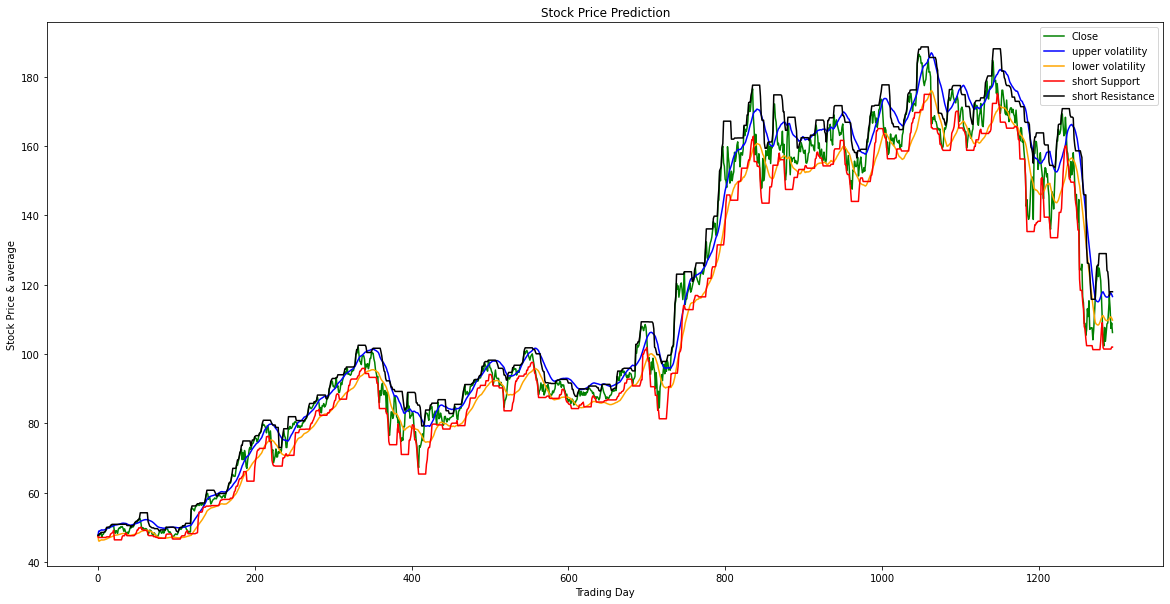

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(df.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df.iloc[:]['Short_support']), color = 'red', label = 'short Support')
plt.plot(list(df.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

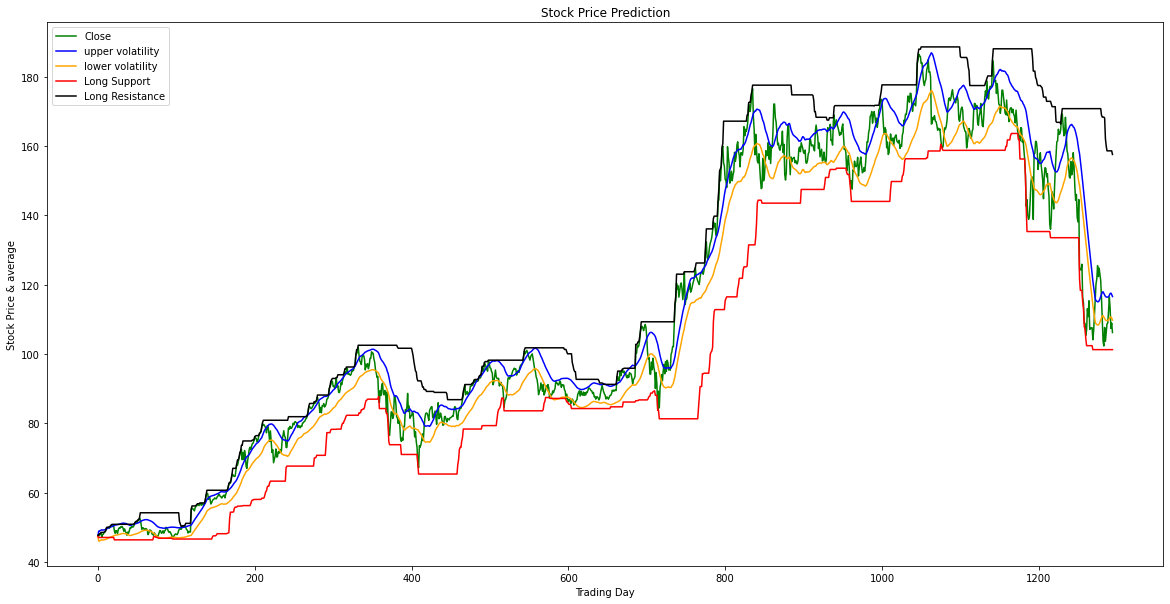

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(list(df.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_target.iloc[:]['Moving_av']), color = 'red', label = 'average')
plt.plot(list(df.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
plt.plot(list(df.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

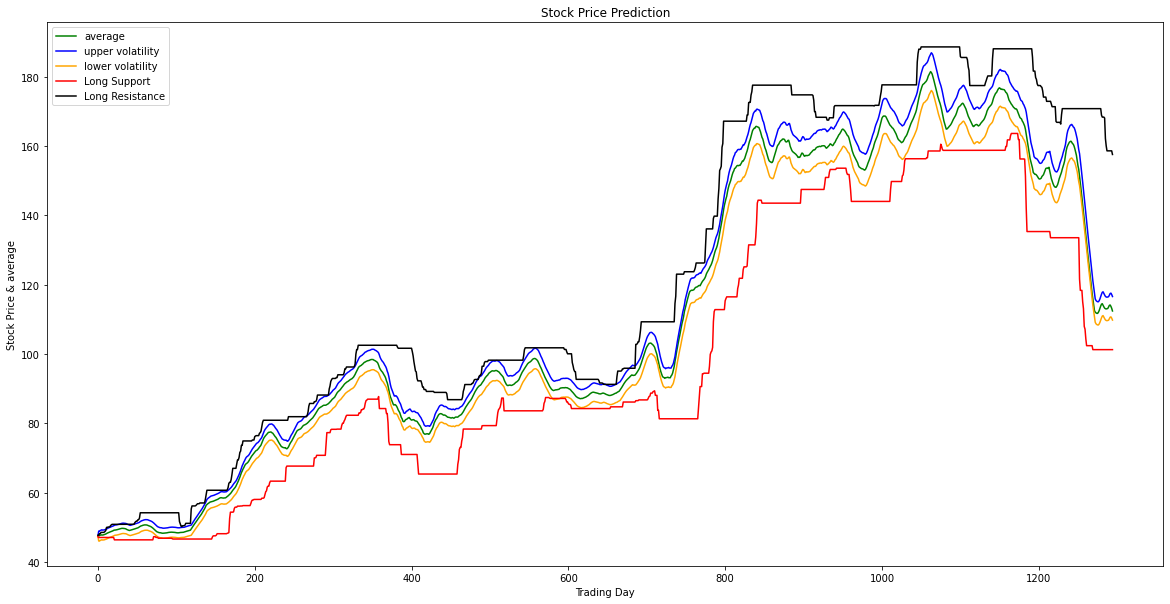

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df.iloc[:]['Moving_av']), color = 'green', label = 'average')
plt.plot(list(df.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df.iloc[:]['Long_support']), color = 'red', label = 'Long Support')
plt.plot(list(df.iloc[:]['Long_resistance']), color = 'black', label = 'Long Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()


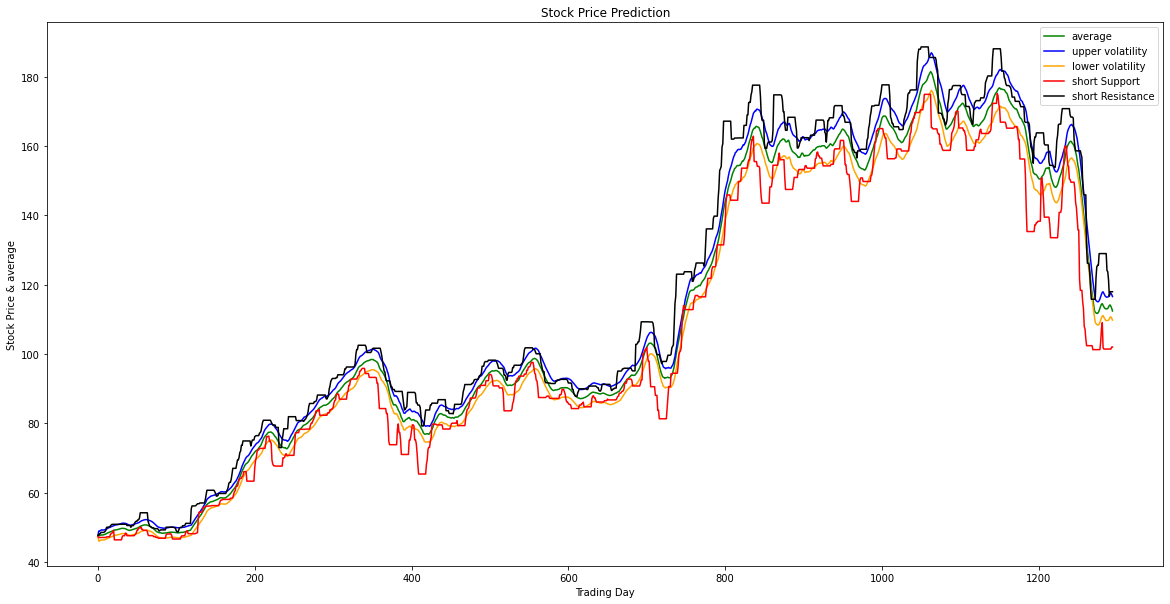

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df.iloc[:]['Moving_av']), color = 'green', label = 'average')
plt.plot(list(df.iloc[:]['Upper_volatility']), color = 'blue', label = 'upper volatility')
plt.plot(list(df.iloc[:]['Lower_volatility']), color = 'orange', label = 'lower volatility')
plt.plot(list(df.iloc[:]['Short_support']), color = 'red', label = 'short Support')
plt.plot(list(df.iloc[:]['Short_resistance']), color = 'black', label = 'short Resistance')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & average')
plt.legend()
plt.show()

In [22]:
df_sp=pd.read_csv('S&P 500 Historical Data.csv')

In [23]:
df_sp.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"May 10, 2017","2,399.63","2,396.79","2,399.74","2,392.79",-,0.11%
1,"May 11, 2017","2,394.44","2,394.84","2,395.72","2,381.74",-,-0.22%
2,"May 12, 2017","2,390.90","2,392.44","2,392.44","2,387.19",-,-0.15%
3,"May 15, 2017","2,402.32","2,393.98","2,404.05","2,393.94",-,0.48%
4,"May 16, 2017","2,400.67","2,404.55","2,405.77","2,396.05",-,-0.07%


In [24]:
df['snp500']=df_sp['Price']

In [25]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support,snp500
0,2017-05-10,47.687500,47.250000,47.674999,47.447498,41930000.0,47.447498,47.447498,47.447498,47.447498,47.687500,47.250000,47.687500,47.250000,"2,399.63"
1,2017-05-11,47.514500,47.039001,47.255501,47.381001,43882000.0,47.381001,47.414249,48.870923,46.024073,47.687500,47.039001,47.687500,47.039001,"2,394.44"
2,2017-05-12,48.139500,47.576500,47.724998,48.067501,72518000.0,48.067501,47.632000,48.836677,45.991822,48.139500,47.039001,48.139500,47.039001,"2,390.90"
3,2017-05-15,48.157501,47.803001,47.936501,47.898499,85412000.0,47.898499,47.698625,49.060960,46.203040,48.157501,47.039001,48.157501,47.039001,"2,402.32"
4,2017-05-16,48.502998,48.045502,48.049999,48.303501,62522000.0,48.303501,47.819600,49.129583,46.267666,48.502998,47.039001,48.502998,47.039001,"2,400.67"


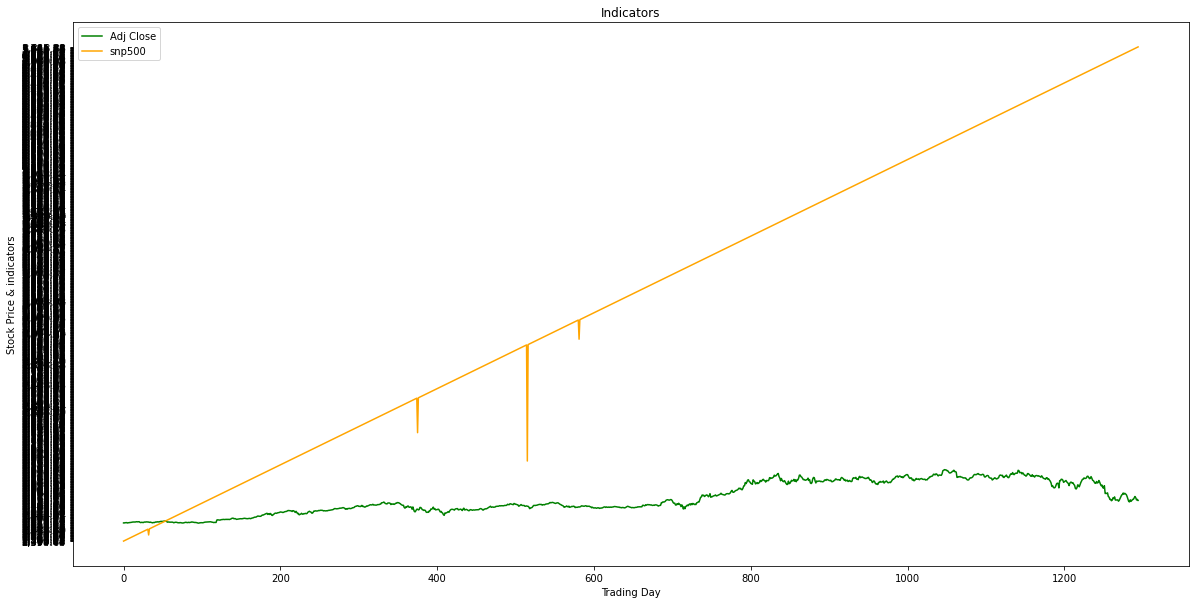

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
plt.plot(list(df.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
#plt.plot(list(df_3.iloc[:]['Dow_jones']), color = 'blue', label = 'Dow_jones')
plt.plot(list(df[:]['snp500']), color = 'orange', label = 'snp500')

plt.title('Indicators')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & indicators')
plt.legend()
plt.show()

In [27]:
#There is hardly any correlation. So, We drop the snp500 column
df=df.drop('snp500', axis=1)

In [28]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Moving_av,Upper_volatility,Lower_volatility,Short_resistance,Short_support,Long_resistance,Long_support
0,2017-05-10,47.687500,47.250000,47.674999,47.447498,41930000.0,47.447498,47.447498,47.447498,47.447498,47.687500,47.250000,47.687500,47.250000
1,2017-05-11,47.514500,47.039001,47.255501,47.381001,43882000.0,47.381001,47.414249,48.870923,46.024073,47.687500,47.039001,47.687500,47.039001
2,2017-05-12,48.139500,47.576500,47.724998,48.067501,72518000.0,48.067501,47.632000,48.836677,45.991822,48.139500,47.039001,48.139500,47.039001
3,2017-05-15,48.157501,47.803001,47.936501,47.898499,85412000.0,47.898499,47.698625,49.060960,46.203040,48.157501,47.039001,48.157501,47.039001
4,2017-05-16,48.502998,48.045502,48.049999,48.303501,62522000.0,48.303501,47.819600,49.129583,46.267666,48.502998,47.039001,48.502998,47.039001


In [29]:
RNN_data_cols=['High','Low','Open','Close','Volume','Adj Close','Moving_av']

In [30]:
Regression_data_cols=['Upper_volatility','Lower_volatility','Short_resistance','Short_support','Long_resistance','Long_support']

In [31]:
RNN_data=df[RNN_data_cols]
Regression_data=df[Regression_data_cols]

In [32]:
df_target=df['Adj Close']

In [34]:
df_target_n=df['Adj Close'].values

In [36]:
RNN_data_n=df[RNN_data_cols].values

In [37]:
RNN_data_n.shape

(1295, 7)

In [40]:
Regression_data=df[Regression_data_cols].values

In [47]:
import numpy as np
RNN_train = []
y_train = []
for i in range(20,len(RNN_data_n)):
    RNN_train.append(RNN_data_n[i-20:i,:])
    y_train.append(df_target_n[i])
    
RNN_train, y_train = np.array(RNN_train), np.array(y_train)

In [49]:
RNN_train.shape

(1275, 20, 7)

In [50]:
y_train.shape

(1275,)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_tra, y_test= train_test_split(RNN_train, y_train, shuffle=False, test_size=0.2)

In [87]:
print(X_train.shape)
print(X_test.shape)

(1020, 20, 7)
(255, 20, 7)


In [52]:
Regression_data=df[Regression_data_cols]

In [53]:
Regression_data_2=Regression_data[20:]

In [54]:
Regression_train=Regression_data_2.values

In [78]:
Regression_training=Regression_train[:1020]
print(Regression_training.shape)

(1020, 6)


In [79]:
Regression_test=Regression_train[1020:]
print(Regression_test.shape)

(255, 6)


In [55]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Input
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.layers import Dropout,add
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint

In [56]:
def model():
    inputs_RNN=Input(RNN_train.shape[1:])
    lstm_1=LSTM(units = 64, return_sequences = True)(inputs_RNN)
    dr1=Dropout(0.2)(lstm_1)
    lstm_2=LSTM(units = 64, return_sequences = True)(dr1)
    dr2=Dropout(0.2)(lstm_2)
    lstm_3=LSTM(units = 128)(dr2)
    dense_out=Dense(32,activation='relu')(lstm_3)
    
    inputs_regress=Input(Regression_train.shape[1:])
    dense_0=Dense(32,activation='relu')(inputs_regress)
    added=add([dense_0,dense_out])
    dense_1=Dense(128,activation='relu')(added)
    dense_2=Dense(128,activation='relu')(dense_1)
    dense_3=Dense(256,activation='relu')(dense_2)
    output=Dense(1,activation='linear')(dense_3)
    
    mdl= Model(inputs=[inputs_RNN,inputs_regress],outputs=[output])
    
    mdl.summary()
    
    mdl.compile(loss="mean_absolute_error", optimizer="Adam")
    
    return mdl

In [57]:
Model=model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 7)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 20, 64)       18432       ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 20, 64)       0           ['lstm[0][0]']                   
                                                                                                  
 lstm_1 (LSTM)                  (None, 20, 64)       33024       ['dropout[0][0]']                
                                                                                              

In [58]:
from tensorflow.keras.utils import plot_model

In [59]:
plot_model(Model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [88]:
#import tensorflow_core
name_to_save='model_total.h5'
#callback_mc=tensorflow_core.keras.callbacks.ModelCheckpoint(filepath=name_to_save,monitor='loss',verbose=0,save_best_only=True,save_weights_only=False,mode='min',save_freq='epoch')
    
#callback_es=tensorflow_core.keras.callbacks.EarlyStopping(
   # monitor='loss', min_delta=0, patience=30, verbose=0,
    #mode='min', baseline=None, restore_best_weights=False)
    

Model.fit([X_train,Regression_training], y_tra, epochs = 800, batch_size = 32)

Epoch 1/800
32/32 [==============================] - 1s 22ms/step - loss: 17.7099
Epoch 2/800
32/32 [==============================] - 1s 23ms/step - loss: 3.7208
Epoch 3/800
32/32 [==============================] - 1s 23ms/step - loss: 2.5740
Epoch 4/800
32/32 [==============================] - 1s 19ms/step - loss: 2.9450
Epoch 5/800
32/32 [==============================] - 1s 24ms/step - loss: 2.5748
Epoch 6/800
32/32 [==============================] - 1s 22ms/step - loss: 2.5181
Epoch 7/800
32/32 [==============================] - 1s 22ms/step - loss: 2.4584
Epoch 8/800
32/32 [==============================] - 1s 20ms/step - loss: 2.7290
Epoch 9/800
32/32 [==============================] - 1s 24ms/step - loss: 2.5617
Epoch 10/800
32/32 [==============================] - 1s 23ms/step - loss: 2.6734
Epoch 11/800
32/32 [==============================] - 1s 23ms/step - loss: 2.6087
Epoch 12/800
32/32 [==============================] - 1s 23ms/step - loss: 2.4318
Epoch 13/800
32/32 [====

Epoch 101/800
32/32 [==============================] - 1s 23ms/step - loss: 2.3178
Epoch 102/800
32/32 [==============================] - 1s 23ms/step - loss: 2.6431
Epoch 103/800
32/32 [==============================] - 1s 23ms/step - loss: 2.5961
Epoch 104/800
32/32 [==============================] - 1s 23ms/step - loss: 2.3676
Epoch 105/800
32/32 [==============================] - 1s 23ms/step - loss: 2.3424
Epoch 106/800
32/32 [==============================] - 1s 23ms/step - loss: 2.3208
Epoch 107/800
32/32 [==============================] - 1s 23ms/step - loss: 2.7532
Epoch 108/800
32/32 [==============================] - 1s 23ms/step - loss: 2.5097
Epoch 109/800
32/32 [==============================] - 1s 23ms/step - loss: 2.3830
Epoch 110/800
32/32 [==============================] - 1s 23ms/step - loss: 2.4361
Epoch 111/800
32/32 [==============================] - 1s 23ms/step - loss: 2.5030
Epoch 112/800
32/32 [==============================] - 1s 24ms/step - loss: 2.3464
Epoc

32/32 [==============================] - 1s 29ms/step - loss: 2.5501
Epoch 200/800
32/32 [==============================] - 1s 27ms/step - loss: 2.2758
Epoch 201/800
32/32 [==============================] - 1s 30ms/step - loss: 2.2377
Epoch 202/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2896
Epoch 203/800
32/32 [==============================] - 1s 29ms/step - loss: 2.3421
Epoch 204/800
32/32 [==============================] - 1s 31ms/step - loss: 2.2248
Epoch 205/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2117
Epoch 206/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2654
Epoch 207/800
32/32 [==============================] - 1s 30ms/step - loss: 2.2413
Epoch 208/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2791
Epoch 209/800
32/32 [==============================] - 1s 29ms/step - loss: 2.4465
Epoch 210/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2466
Epoch 211/800
32/3

32/32 [==============================] - 1s 25ms/step - loss: 2.3045
Epoch 298/800
32/32 [==============================] - 1s 24ms/step - loss: 2.1664
Epoch 299/800
32/32 [==============================] - 1s 24ms/step - loss: 2.3029
Epoch 300/800
32/32 [==============================] - 1s 24ms/step - loss: 2.2074
Epoch 301/800
32/32 [==============================] - 1s 24ms/step - loss: 2.2116
Epoch 302/800
32/32 [==============================] - 1s 24ms/step - loss: 2.1743
Epoch 303/800
32/32 [==============================] - 1s 24ms/step - loss: 2.2995
Epoch 304/800
32/32 [==============================] - 1s 24ms/step - loss: 2.2625
Epoch 305/800
32/32 [==============================] - 1s 23ms/step - loss: 2.4591
Epoch 306/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1626
Epoch 307/800
32/32 [==============================] - 1s 32ms/step - loss: 2.3730
Epoch 308/800
32/32 [==============================] - 1s 31ms/step - loss: 2.1719
Epoch 309/800
32/3

32/32 [==============================] - 1s 25ms/step - loss: 2.0921
Epoch 396/800
32/32 [==============================] - 1s 24ms/step - loss: 2.2107
Epoch 397/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1635
Epoch 398/800
32/32 [==============================] - 1s 24ms/step - loss: 2.1035
Epoch 399/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1093
Epoch 400/800
32/32 [==============================] - 1s 26ms/step - loss: 2.1025
Epoch 401/800
32/32 [==============================] - 1s 25ms/step - loss: 2.2712
Epoch 402/800
32/32 [==============================] - 1s 25ms/step - loss: 2.2698
Epoch 403/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1726
Epoch 404/800
32/32 [==============================] - 1s 25ms/step - loss: 2.0761
Epoch 405/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1651
Epoch 406/800
32/32 [==============================] - 1s 25ms/step - loss: 2.1137
Epoch 407/800
32/3

32/32 [==============================] - 1s 28ms/step - loss: 2.0717
Epoch 494/800
32/32 [==============================] - 1s 27ms/step - loss: 2.0217
Epoch 495/800
32/32 [==============================] - 1s 29ms/step - loss: 2.0200
Epoch 496/800
32/32 [==============================] - 1s 30ms/step - loss: 2.0111
Epoch 497/800
32/32 [==============================] - 1s 29ms/step - loss: 2.1447
Epoch 498/800
32/32 [==============================] - 1s 28ms/step - loss: 2.1657
Epoch 499/800
32/32 [==============================] - 1s 29ms/step - loss: 2.1587
Epoch 500/800
32/32 [==============================] - 1s 31ms/step - loss: 2.1182
Epoch 501/800
32/32 [==============================] - 1s 29ms/step - loss: 2.2994
Epoch 502/800
32/32 [==============================] - 1s 29ms/step - loss: 2.0613
Epoch 503/800
32/32 [==============================] - 1s 28ms/step - loss: 2.0696
Epoch 504/800
32/32 [==============================] - 1s 27ms/step - loss: 2.1013
Epoch 505/800
32/3

32/32 [==============================] - 1s 27ms/step - loss: 1.9870
Epoch 592/800
32/32 [==============================] - 1s 30ms/step - loss: 2.2841
Epoch 593/800
32/32 [==============================] - 1s 28ms/step - loss: 2.0958
Epoch 594/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9863
Epoch 595/800
32/32 [==============================] - 1s 28ms/step - loss: 2.0359
Epoch 596/800
32/32 [==============================] - 1s 27ms/step - loss: 2.2483
Epoch 597/800
32/32 [==============================] - 1s 27ms/step - loss: 2.1655
Epoch 598/800
32/32 [==============================] - 1s 27ms/step - loss: 2.1280
Epoch 599/800
32/32 [==============================] - 1s 27ms/step - loss: 2.0172
Epoch 600/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9896
Epoch 601/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9849
Epoch 602/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9647
Epoch 603/800
32/3

32/32 [==============================] - 1s 26ms/step - loss: 1.9646
Epoch 690/800
32/32 [==============================] - 1s 27ms/step - loss: 2.0799
Epoch 691/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0625
Epoch 692/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0003
Epoch 693/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0719
Epoch 694/800
32/32 [==============================] - 1s 26ms/step - loss: 1.9285
Epoch 695/800
32/32 [==============================] - 1s 26ms/step - loss: 2.1100
Epoch 696/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0513
Epoch 697/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0835
Epoch 698/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0793
Epoch 699/800
32/32 [==============================] - 1s 26ms/step - loss: 2.0271
Epoch 700/800
32/32 [==============================] - 1s 26ms/step - loss: 1.9769
Epoch 701/800
32/3

32/32 [==============================] - 1s 27ms/step - loss: 1.9163
Epoch 788/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9885
Epoch 789/800
32/32 [==============================] - 1s 27ms/step - loss: 1.8752
Epoch 790/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9495
Epoch 791/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9712
Epoch 792/800
32/32 [==============================] - 1s 30ms/step - loss: 1.9498
Epoch 793/800
32/32 [==============================] - 1s 31ms/step - loss: 1.9653
Epoch 794/800
32/32 [==============================] - 1s 27ms/step - loss: 2.0385
Epoch 795/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9930
Epoch 796/800
32/32 [==============================] - 1s 27ms/step - loss: 2.0054
Epoch 797/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9528
Epoch 798/800
32/32 [==============================] - 1s 27ms/step - loss: 1.9630
Epoch 799/800
32/3

In [89]:
predicted=Model.predict([X_train,Regression_training])

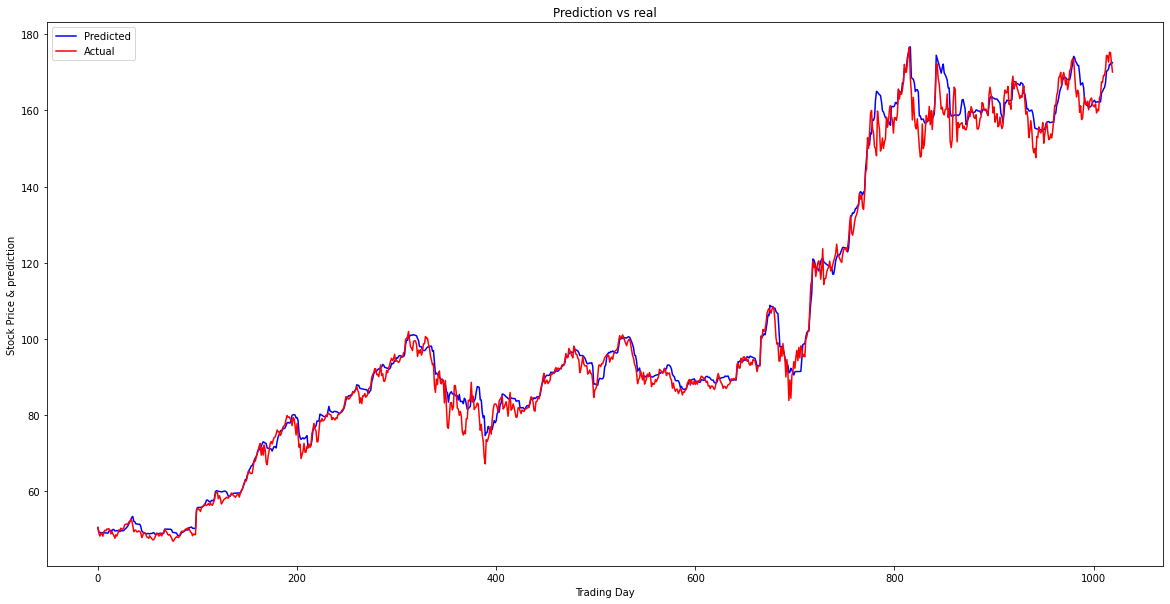

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(predicted, color = 'blue', label = 'Predicted')
plt.plot(y_tra, color = 'red', label = 'Actual')

plt.title('Prediction vs real')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & prediction')
plt.legend()
plt.show()

# Testing

In [91]:
pred_test=Model.predict([X_test, Regression_test])

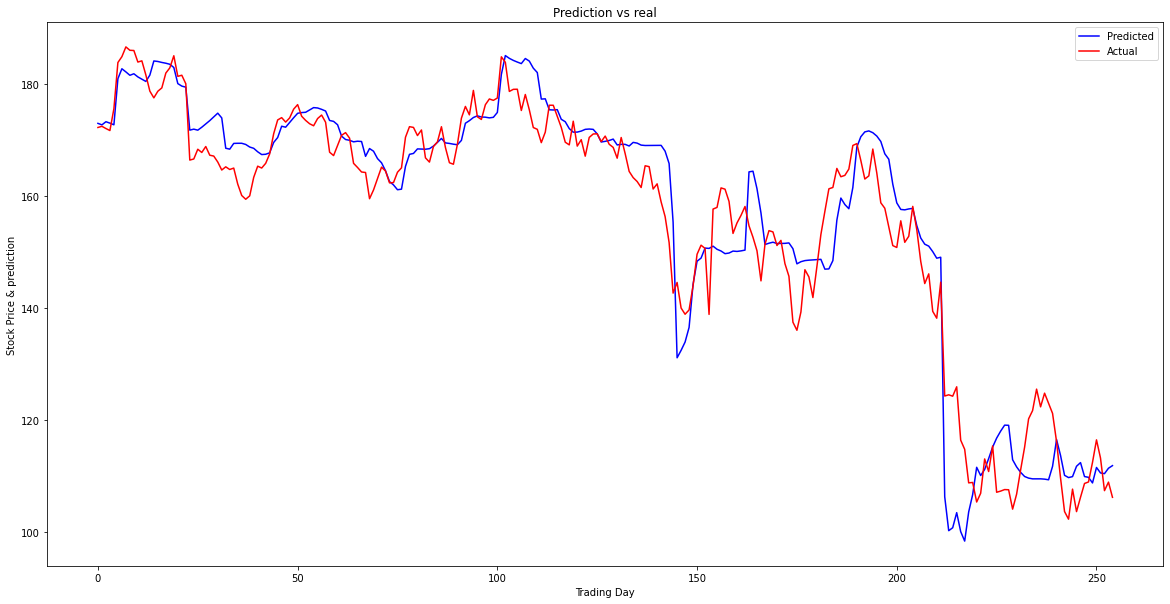

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
#plt.plot(list(df_target.iloc[:]['Adj Close']), color = 'green', label = 'Close')
#plt.plot(list(df_3.iloc[:]['Adj Close']), color = 'green', label = 'Adj Close')
plt.plot(pred_test, color = 'blue', label = 'Predicted')
plt.plot(y_test, color = 'red', label = 'Actual')

plt.title('Prediction vs real')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price & prediction')
plt.legend()
plt.show()